# Predicting cervical cancer risk using lifestyle choices in female patients

# Introduction 

Cervical cancer is considered the 2nd highest cause of death in North American women.<sup>1</sup> Treating cancer in early stages is easier and often prevents the spread of tumor to other organs in the body. However, due to lack of medical accessibility, most women do not receive an early diagnosis. This project uses the “Cervical Cancers” dataset from the UCI Machine Learning Repository, which contains anonymous medical data from 858 patients in Caracas, Venezuela. Using some of the variables in this dataset (specifically relating to the patient’s age and lifestyle), we will try and determine which variable(s) best predict cancer within this dataset, and create a KNN classification model that could be used to try and predict which patients are most susceptible to cervical cancer. **Hence, can we use lifestyle factors to predict which women will have a positive cervical cancer diagnosis by building a KNN classification model using the observations from the Cervical Cancer dataset?** We want to know, of the variables listed in the dataset, which lifestyle factors are the best predictors for a patient’s risk of being diagnosed with cancer, i.e. which groups of women are most likely to be diagnosed with cancer, and therefore should get tested more regularly.

The predictors we used:"Age" = Age of a person,         
           "Number.of.sexual.partners" = number of sexual partners,    
           "First.sexual.intercourse" = Age of first sexual intercourse,     
           "Num.of.pregnancies" = number of pregnancies,    
           "Smokes..years." = number of years of smoking,   
           "Hormonal.Contraceptives..years." = number of years of hormonal contraceptive use,   
           "IUD..years." = number of years of IUD use

The target variable: Biopsy - this is considered the best variable to determine cervical cancer. A positive biopsy result indicates positive cervical cancer diagnosis.  


Various libraries are loaded and packages installed to wrangle the data. 

In [1]:
library(tidyverse)
library(repr)
library(GGally)
library(caret) # for KNN classification
library(dplyr) # for ggplot2
install.packages("naniar") # to remove NA
library(naniar)



── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


# METHOD    
### Preliminary Exploratory Analysis

In the following cells below, we are simply reading the data from the UCI machine learning database and loading in the dataset. The dataset contains 36 columns with both biological predictors, which includes STD diagnosis, Hinselman Colposcopy (a form and method of detecting cervical cancer in women), human papillomavirus (HPV) diagnoses, and so on, as well as lifestyle predictors, which includes number of sexual partners, number of pregnancies, types of contraception and how long they have been taking specific their specific type of contraception.
The data was read directly using a url. The column names were changed to remove the space between the words. 

In [2]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv"
cancer <- read_csv(url)
colnames(cancer) <- make.names(colnames(cancer))
head(cancer)

Parsed with column specification:
cols(
  .default = col_character(),
  Age = col_double(),
  `STDs: Number of diagnosis` = col_double(),
  `Dx:Cancer` = col_double(),
  `Dx:CIN` = col_double(),
  `Dx:HPV` = col_double(),
  Dx = col_double(),
  Hinselmann = col_double(),
  Schiller = col_double(),
  Citology = col_double(),
  Biopsy = col_double()
)
See spec(...) for full column specifications.


Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes,Smokes..years.,Smokes..packs.year.,Hormonal.Contraceptives,Hormonal.Contraceptives..years.,IUD,⋯,STDs..Time.since.first.diagnosis,STDs..Time.since.last.diagnosis,Dx.Cancer,Dx.CIN,Dx.HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,?,?,0,0,0,0,0,0,0,0
15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,?,?,0,0,0,0,0,0,0,0
34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,?,?,0,0,0,0,0,0,0,0
52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,⋯,?,?,1,0,1,0,0,0,0,0
46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,⋯,?,?,0,0,0,0,0,0,0,0
42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,⋯,?,?,0,0,0,0,0,0,0,0


### Table 1: Raw Cervical Cancer Data set

Step 1 - We select the target and predictor variables specific to the lifestyle choices and assign it to **cancer2**. For the purposes of our study, the variables are: 
* Age
* Number of sexual partners
* Age at first sexual intercourse
* Number of pregnancies
* Length of smoking (in years)
* Length of hormonal contraception usage (in years)
* Length of intrauterine device usage (in years)
* Biposy as a boolean 

Step 2 - we convert all data observations marked as "?" into NA in order to discard as they will have no weightage in the classifer due to inconclusive values  <br/>


Step 3 - We remove all rows with NA using na.omit()


In [3]:
cancer2 <- cancer %>%                                       #Step 1 
    select("Age", "Number.of.sexual.partners", "First.sexual.intercourse", 
           "Num.of.pregnancies",  "Smokes..years.",  
           "Hormonal.Contraceptives..years.", "IUD..years.","Biopsy")

cancer2 <- cancer2 %>%                                      #Step 2
    replace_with_na_all(condition = ~.x %in% "?")
 
cancer2 <- na.omit(cancer2)                                  #Step 3



Step 4 - We convert all continous variables into numeric type. The target variable is converted into factor for the purpose of plotting as a characteristic rather than a number. R processes booleans as 0 and 1 numeric states so when read and tidied, they must be converted to a factor to make sure they are treated as states.

In [4]:
cancer2 <- cancer2%>%                                        #Step 4
          mutate_if(is.character, as.numeric)

cancer2 = cancer2 %>%
                mutate(Biopsy = as.factor(Biopsy))
head(cancer2)

Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes..years.,Hormonal.Contraceptives..years.,IUD..years.,Biopsy
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
18,4,15,1,0,0,0,0
15,1,14,1,0,0,0,0
52,5,16,4,37,3,0,0
46,3,21,4,0,15,0,0
42,3,23,2,0,0,0,0
51,3,17,6,34,0,7,1


### Table 2: Cervical cancer data set with selected predictor columns, target variable and missing data omitted 

We find the number of positive (this is shown as 1) and negative (shown as 0) biopsy results to see if the data is balanced. Table 3 shows the data isn't balanced. This means we will have to carry out **upSample** on the training data after our exploratory data analysis in order to make sure that our true-state biopsies will have more voting power in the classifer trainer.

In [5]:
cancer2 %>%
    group_by(Biopsy) %>%
    summarize(n = n())

Biopsy,n
<fct>,<int>
0,626
1,46


### Table 3: Biopsy count from the data set

The data set is split into test set (to validate the knn classifier) and training sets (to build the model/ clissifier upon) based on the **Biopsy** variable. The training set 'teaches' the classifier, so it can predict on unknown observations. We use the test set, i.e observations the model hasn't seen, to validate the classifier and find the accuracy of our model. The **set.seed** is to ensure we get the same random configuration of data every time we use it. 

In [6]:
set.seed(1)

set_rows <- cancer2 %>% 
  select(Biopsy) %>% 
  unlist() %>% 
  createDataPartition(p = 0.75, list = FALSE)

training_set <- cancer2 %>% 
    slice(set_rows)

test_set <- cancer2 %>% 
    slice(-set_rows)

head(training_set)

Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes..years.,Hormonal.Contraceptives..years.,IUD..years.,Biopsy
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
18,4,15,1,0,0,0,0
15,1,14,1,0,0,0,0
52,5,16,4,37,3,0,0
46,3,21,4,0,15,0,0
42,3,23,2,0,0,0,0
51,3,17,6,34,0,7,1


### Table 4: Training set (75% of our data)

In [7]:
head(test_set)

Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes..years.,Hormonal.Contraceptives..years.,IUD..years.,Biopsy
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
27,1,17,3,0,8.00,0,0
44,2,25,2,0,5.00,0,0
43,2,18,5,0,0.00,8,0
40,3,18,2,0,15.00,0,0
41,3,17,4,0,10.00,0,0
40,1,18,1,0,0.25,0,1


### Table 5: Test set (25% of our data)

Using only the training set, we summarize the data in a table (this is part of the exploratory data analysis). 

In [8]:
set.seed(1)

table <- training_set %>%
    select(Age, Number.of.sexual.partners, First.sexual.intercourse, Num.of.pregnancies, Smokes..years., 
           Hormonal.Contraceptives..years., IUD..years.) %>%
    gather(key = Predictor, value = Measurement) %>%
    group_by(Predictor) %>%
    summarize(Min = min(Measurement, na.rm = TRUE),
             Max = max(Measurement, na.rm = TRUE),
             Mean = mean(Measurement, na.rm = TRUE))

table

Predictor,Min,Max,Mean
<chr>,<dbl>,<dbl>,<dbl>
Age,13,84,27.2316832
First.sexual.intercourse,10,32,17.1326733
Hormonal.Contraceptives..years.,0,20,2.3021275
IUD..years.,0,19,0.5568911
Num.of.pregnancies,0,11,2.3148515
Number.of.sexual.partners,1,28,2.5801980
Smokes..years.,0,37,1.4426985


### Table 6: Min, max and mean of the predictors in the training set

The range of years for different predictor variables are quite different. We need to scale the predictor variables to ensure the effect they have on the K nearest classification are same. 

In [9]:
scaled_cancer2 <- cancer2%>%                                    
            select(c(-Biopsy))%>%
            scale (center = TRUE)
cancer2 <- data.frame(scaled_cancer2, Biopsy = cancer2$Biopsy)
head(cancer2)

Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes..years.,Hormonal.Contraceptives..years.,IUD..years.,Biopsy
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-1.060537,0.9013913,-0.75067265,-0.9037407,-0.2936676,-0.6167350,-0.2639984,0
-1.404994,-0.9304685,-1.10196236,-0.9037407,-0.2936676,-0.6167350,-0.2639984,0
2.843307,1.5120112,-0.39938294,1.1479950,8.5534040,0.1899753,-0.2639984,0
2.154393,0.2907714,1.35706561,1.1479950,-0.2936676,3.4168168,-0.2639984,0
1.695117,0.2907714,2.05964503,-0.2198288,-0.2936676,-0.6167350,-0.2639984,0
2.728488,0.2907714,-0.04809323,2.5158188,7.8360739,-0.6167350,3.2434532,1


### Table 7: Cervical cancer data set with selected predictor columns and scaled variables

We split our scaled cancer data set into training and testing set again. We use the training set to build our classifier or teach our model. 

In [10]:
set.seed(1)

set_rows <- cancer2 %>% 
  select(Biopsy) %>% 
  unlist() %>% 
  createDataPartition(p = 0.75, list = FALSE)

training_set <- cancer2 %>% 
    slice(set_rows)

test_set <- cancer2 %>% 
    slice(-set_rows)

head(training_set)

Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes..years.,Hormonal.Contraceptives..years.,IUD..years.,Biopsy
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-1.060537,0.9013913,-0.75067265,-0.9037407,-0.2936676,-0.6167350,-0.2639984,0
-1.404994,-0.9304685,-1.10196236,-0.9037407,-0.2936676,-0.6167350,-0.2639984,0
2.843307,1.5120112,-0.39938294,1.1479950,8.5534040,0.1899753,-0.2639984,0
2.154393,0.2907714,1.35706561,1.1479950,-0.2936676,3.4168168,-0.2639984,0
1.695117,0.2907714,2.05964503,-0.2198288,-0.2936676,-0.6167350,-0.2639984,0
2.728488,0.2907714,-0.04809323,2.5158188,7.8360739,-0.6167350,3.2434532,1


### Table 8: Training set with scaled variables

In [11]:
head(test_set)

Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes..years.,Hormonal.Contraceptives..years.,IUD..years.,Biopsy
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-0.02716698,-0.9304685,-0.04809323,0.4640831,-0.2936676,1.5344926,-0.2639984,0
1.92475507,-0.3198485,2.76222445,-0.2198288,-0.2936676,0.7277822,-0.2639984,0
1.80993612,-0.3198485,0.30319648,1.8319069,-0.2936676,-0.6167350,3.7445177,0
1.46547929,0.2907714,0.30319648,-0.2198288,-0.2936676,3.4168168,-0.2639984,0
1.58029824,0.2907714,-0.04809323,1.1479950,-0.2936676,2.0722995,-0.2639984,0
1.46547929,-0.9304685,0.30319648,-0.9037407,-0.2936676,-0.5495092,-0.2639984,1


### Table 9: Test set with scaled variables

We gather the data in our training set into a table with just three rows (Biopsy, Predictors and n (count) in order to make a series of histograms that visualize any general themes in the relationships between each predictor and the biopsy count.

In [12]:
cc_plot_data_hist = training_set %>%
            select("Age","First.sexual.intercourse", "Smokes..years.", 
                   "Hormonal.Contraceptives..years.","IUD..years.",
                   "Biopsy")%>%
                     gather(key = Predictors, value = Value, -Biopsy) %>%
                    group_by(Biopsy, Predictors)%>%
                    summarize(n = n())
head (cc_plot_data_hist)

Biopsy,Predictors,n
<fct>,<chr>,<int>
0,Age,470
0,First.sexual.intercourse,470
0,Hormonal.Contraceptives..years.,470
0,IUD..years.,470
0,Smokes..years.,470
1,Age,35


### Table 10: Gathered data with Biopsy set against each Predictor

The histograms below show if there is a trend of positive biopsy diagnosis with respect to each predictor variable. This is to help us determine which predictors to use. For example, we observe that the positive
biopsy diagnosis is skewed to the side on the “Age” and "Hormonal contraceptive years" histograms and on a bell curve for the age of first sexual intercourse and number of sexual partners. 

Also of note, the reported number of positive biopsies is far fewer than negative biopsies. Therefore, we will need to upSample our data in order to best build a classifier to test how the different predictors impact the accuracy of a prediction for a certain observation.

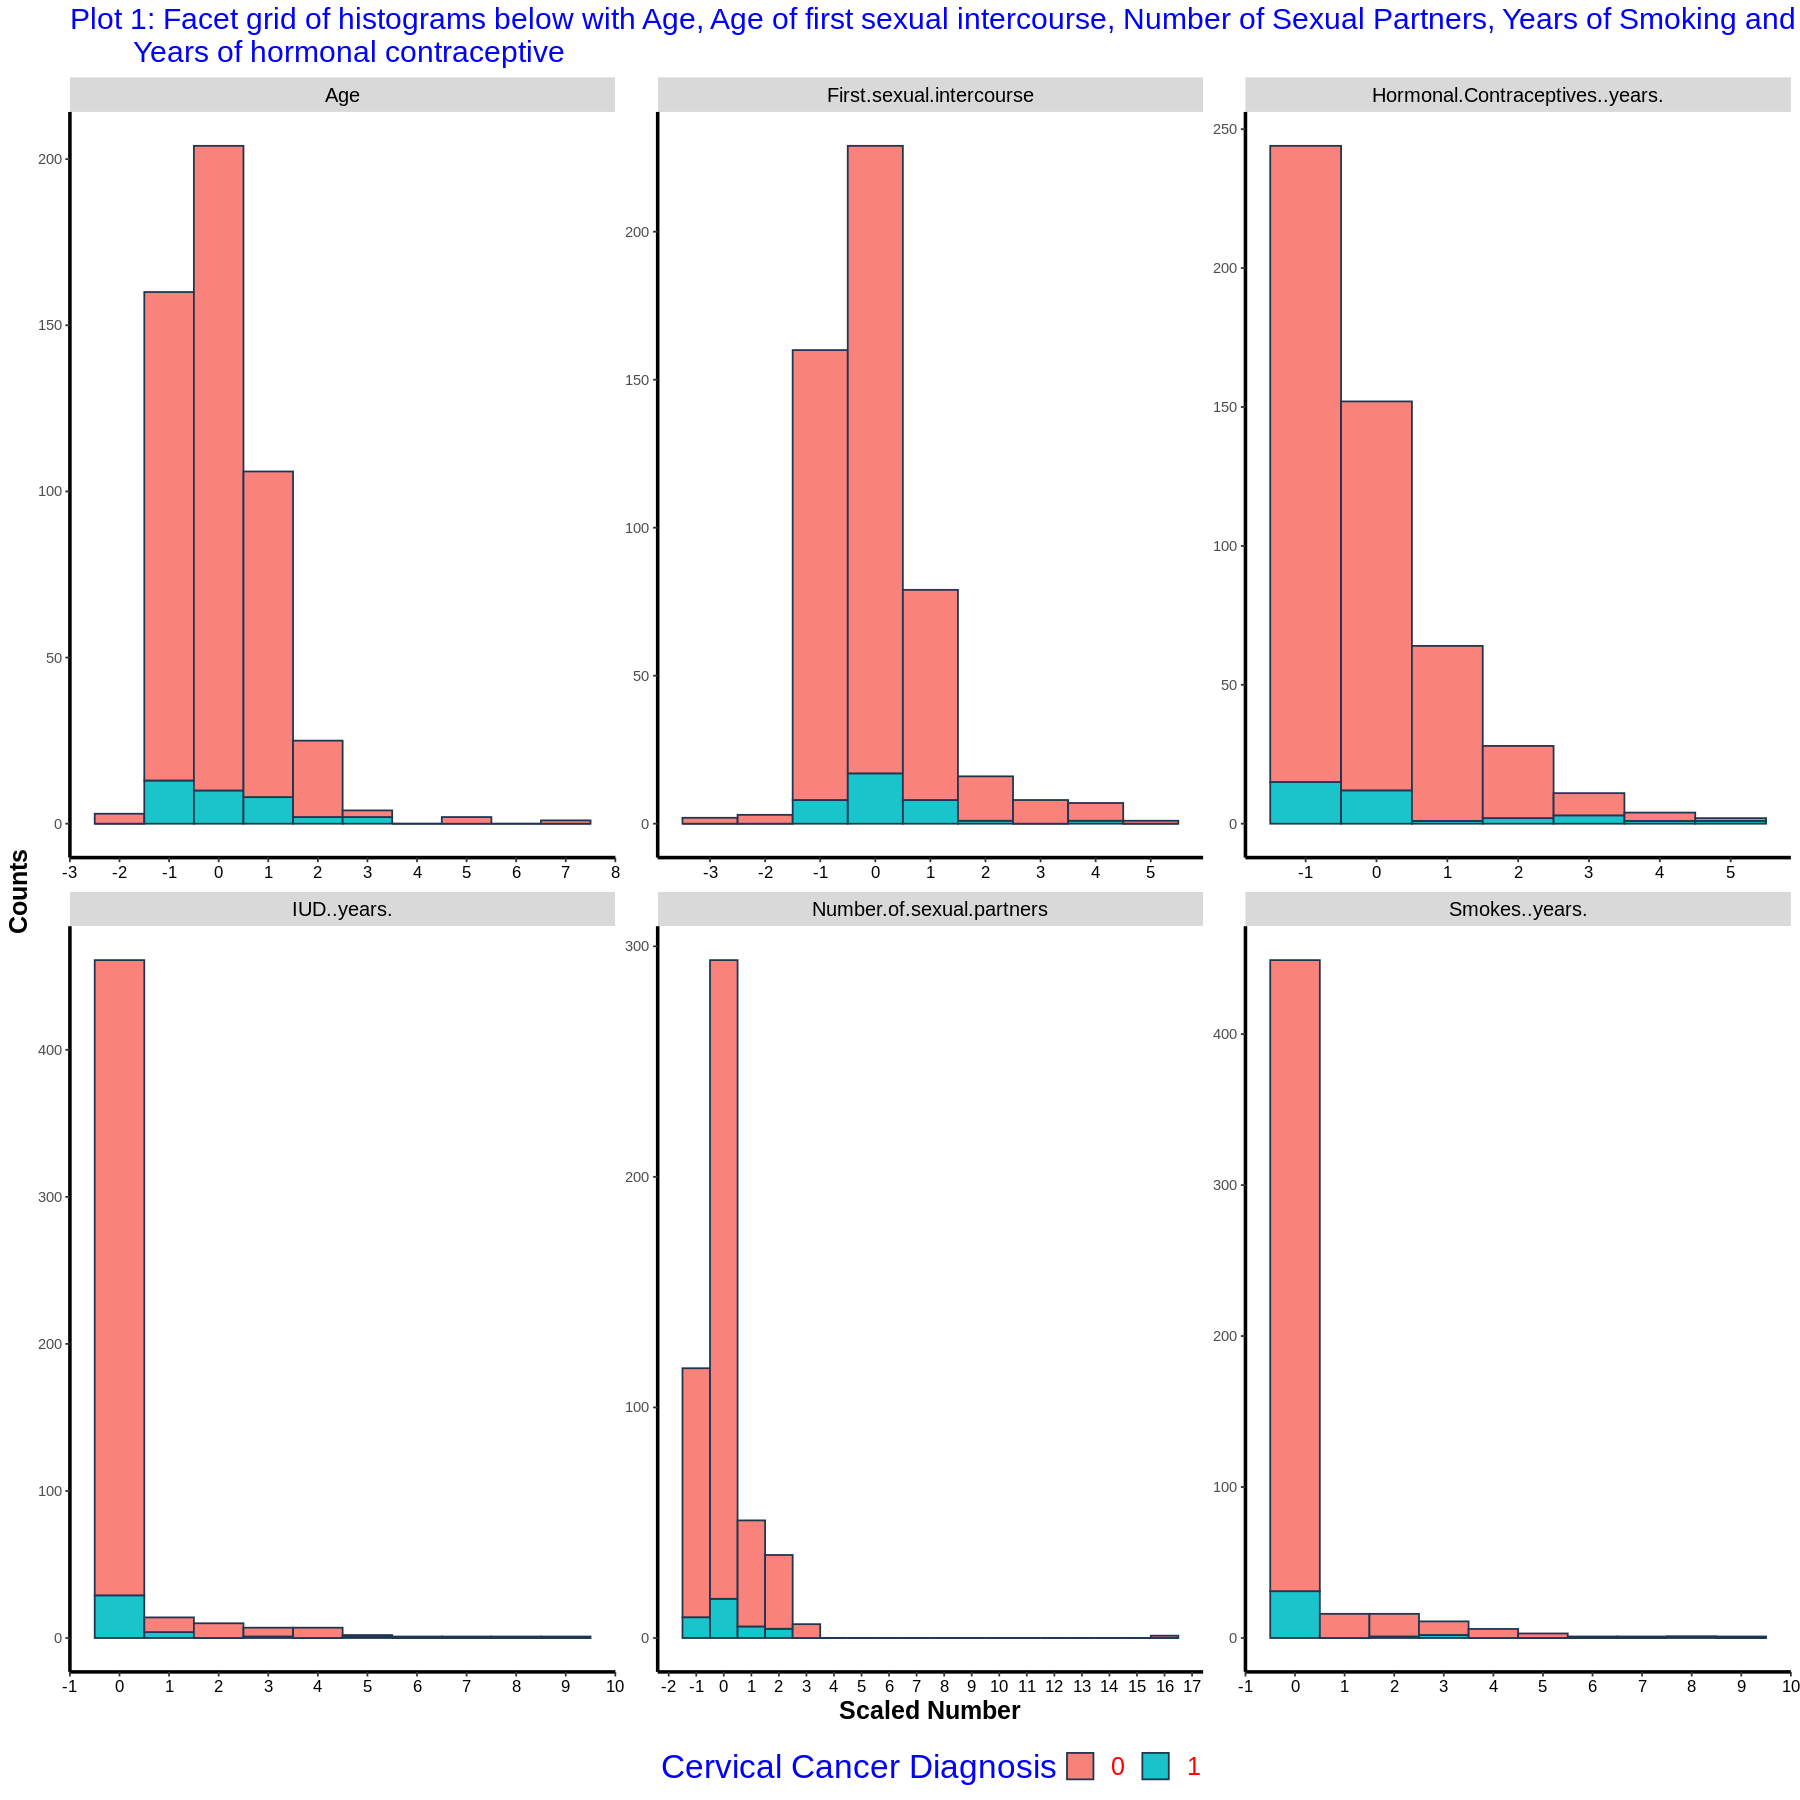

In [13]:
cc_plot_data_hist = training_set %>%
            select("Age","First.sexual.intercourse", 
                   "Hormonal.Contraceptives..years.",
                   "Number.of.sexual.partners", "Smokes..years.", 
                   "IUD..years.",
                   "Biopsy")%>%
                     gather(key = Predictors, value = Value, -Biopsy)
           
options(repr.plot.height = 15, repr.plot.width = 15)

cc_data_plot = cc_plot_data_hist %>%
                 ggplot( aes(x= Value, fill = factor(Biopsy))) +
    geom_histogram( binwidth = 1 , color= "#1F3552", alpha=0.9) +
        scale_x_continuous( name= "Scaled Number" , breaks = seq(-3, 17, 1))+ 
            scale_y_continuous(name = "Counts") +
                theme(axis.text.x=element_text(colour="black", size = 10), 
              panel.border = element_blank(), panel.background = element_blank(),
             axis.line = element_line(size=1, colour = "black"), plot.title = element_text(colour = "blue", size = 18), 
                      legend.position="bottom", 
                  legend.title = element_text(color = "blue", size = 20),
              legend.text = element_text(color = "red", size = 15),  axis.title.x = element_text(color="black", size=15, face="bold"),
        axis.title.y = element_text(color="black", size=15, face="bold"), strip.text.x = element_text(size=12, color="black"))+
            labs(fill = "Cervical Cancer Diagnosis")+
            ggtitle( "Plot 1: Facet grid of histograms below with Age, Age of first sexual intercourse, Number of Sexual Partners, Years of Smoking and Years of IUD use and 
        Years of hormonal contraceptive") +
    # coord_flip()+
                facet_wrap(~Predictors  , scales = "free") 

cc_data_plot

The ggpairs plot below is used to visualize how some of the numerical continuous predictors relate to
each other. There seems to be a positive correlation between age and other predictors like smoking years and number of pregnancies. However, due to the lack of positive diagnosis, we can't discern any particular cluster or point of values that see more of one class label than the other. The correlation between other predictors isn't obvious.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


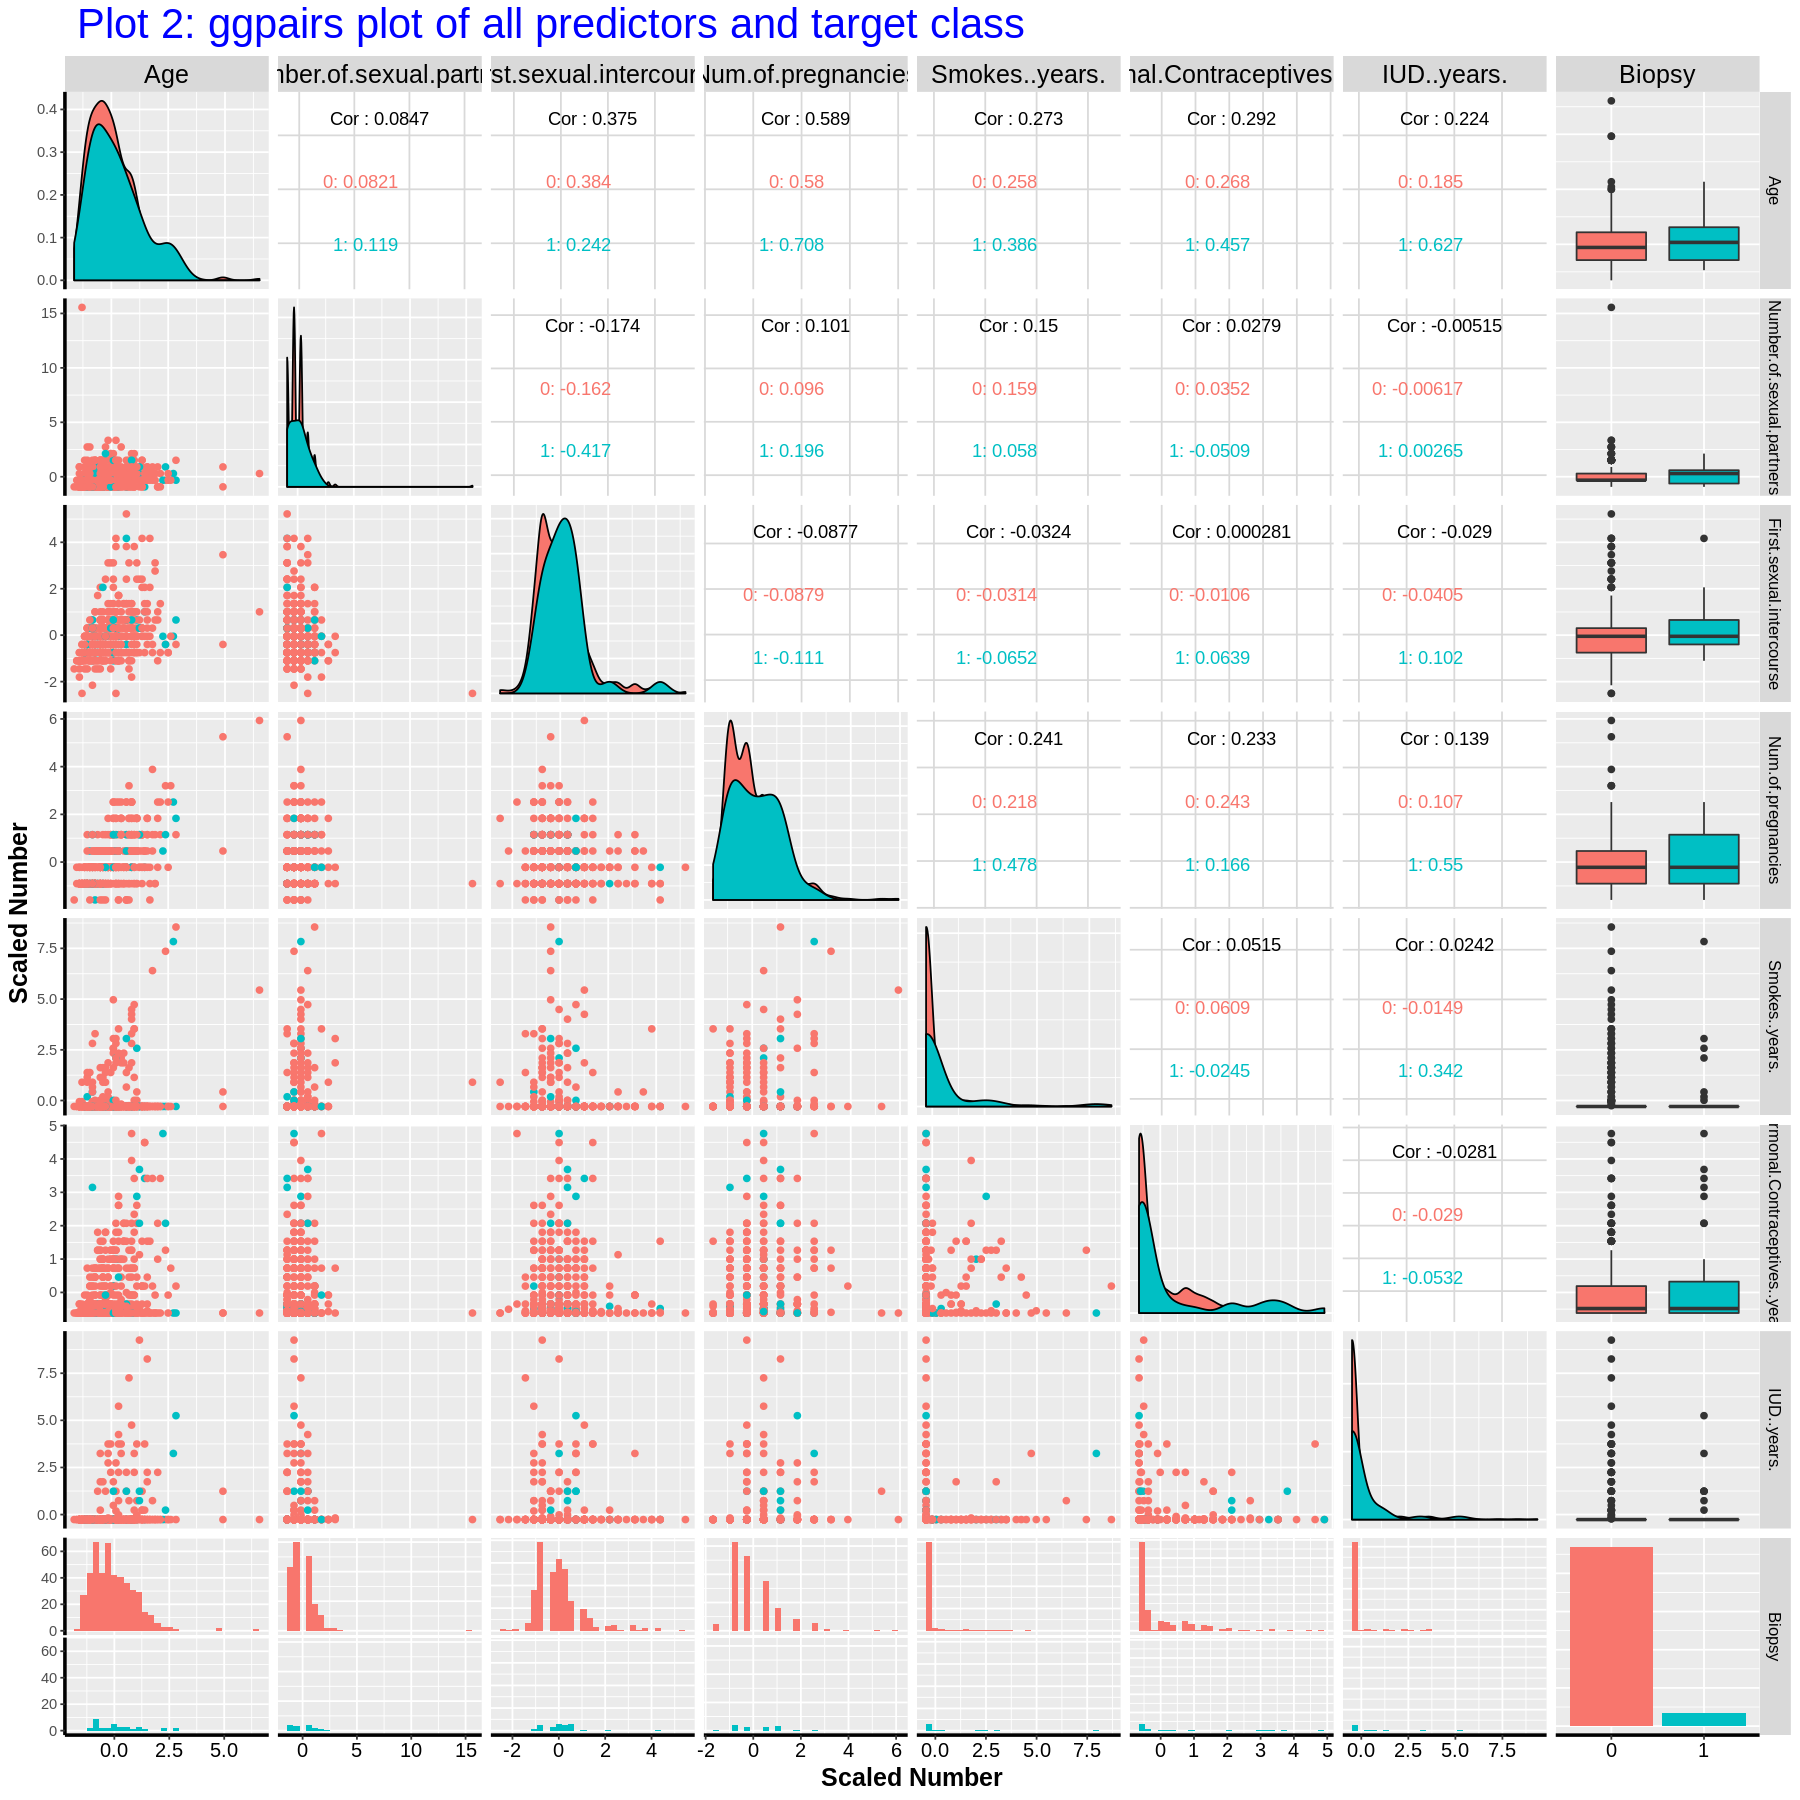

In [14]:
options(repr.plot.height = 15, repr.plot.width = 15)
pairs_plot = ggpairs(training_set, upper = list(continuous = "cor", combo = "box_no_facet", discrete = "facetbar", na = "na"),
            aes( color = as.factor(Biopsy))) +
    ggtitle(" Plot 2: ggpairs plot of all predictors and target class")+  
theme(axis.text.x=element_text(colour="black", size = 12), 
              panel.border = element_blank(), strip.text.x = element_text(size=15, color="black"),
             axis.line = element_line(size=1, colour = "black"), plot.title = element_text(colour = "blue", size = 25), 
                      legend.position="bottom", 
      strip.text= element_text(size=10, color="black"),
                  legend.title = element_text(color = "blue", size = 20),
              legend.text = element_text(color = "red", size = 15),  axis.title.x = element_text(color="black", size=15, 
                face="bold"),
        axis.title.y = element_text(color="black", size=15, face="bold")) +
            labs(x = "Scaled Number", y = "Scaled Number", colour = "Biopsy Diagnosis")
pairs_plot

We use the upSample function to carry out replication/oversampling of the rare data (positive biopsy results), since there are only 46 positive results. After the upSample function, the target class types are balanced (shown in Table 12). IMPORTANT NOTE: Biopsy will now be called Class. 

In [15]:
training_set_up = upSample(x = select(training_set, -Biopsy),
            y = select(training_set, Biopsy) %>% unlist())
head(training_set_up)

Age,Number.of.sexual.partners,First.sexual.intercourse,Num.of.pregnancies,Smokes..years.,Hormonal.Contraceptives..years.,IUD..years.,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-1.0605375,0.9013913,-0.7506727,-0.9037407,-0.2936676,-0.61673504,-0.2639984,0
-1.4049943,-0.9304685,-1.1019624,-0.9037407,-0.2936676,-0.61673504,-0.2639984,0
2.8433066,1.5120112,-0.3993829,1.1479950,8.5534040,0.18997533,-0.2639984,0
2.1543930,0.2907714,1.3570656,1.1479950,-0.2936676,3.41681680,-0.2639984,0
1.6951172,0.2907714,2.0596450,-0.2198288,-0.2936676,-0.61673504,-0.2639984,0
-0.1419859,-0.9304685,3.1135142,0.4640831,-0.2936676,-0.07892813,3.2434532,0


### Table 11: Training set with scaled variables after upSampling

In [16]:
training_set_up %>%
    group_by(Class) %>%
    summarize(n = n())

Class,n
<fct>,<int>
0,470
1,470


### Table 12: Proof that the target class types are balanced

## Methods: Part 2
   ###  Building the Classifier 

Since the preliminary exploratory analysis doesn't obviously discern which predictor variable combination is the best, we will create a KNN classifier/ model using the train function with **all 7 predictors** we have considered so far. We will create different versions of the model where we eliminate a predictor and see the impact this has on the accuracy. If the accuracy decreases, we will reinstate the predictor in our training classifier. Conversely, if the accuracy increases upon removing a predictor, said predictor will be removed and will not be used to train the classifier. Our objective for this exercise is to find the best combination of predictors to train our model.   

The X_train will be a data frame of predictors, and the Y_train will be a vector of Class(ie Biopsy) values. We will perform cross-validation to choose the optimal k value. (Throughout the notebook, we will use K = 3 as this was the best region, from the K vs accuracy plot, to pick K with a reasonable accuracy without overfitting the data)   

We will use the confusionMatrix function to derive the accuracy of the model. 

### Results (A brief Summary)  
We found that combination of predictors used to train classifier **model_knn_4** gave the highest accuracy in predictions (Accuracy = 0.8323353).    
The predictors used to train this model where: Age, First.sexual.intercourse, Num.of.pregnancies, 
            Smokes..years.,  IUD..years.,  Hormonal.Contraceptives..years.


## Classifier 1
We create a classifier with all the predictors called model_knn. The accuracy using confusion matrix was 0.754491. 

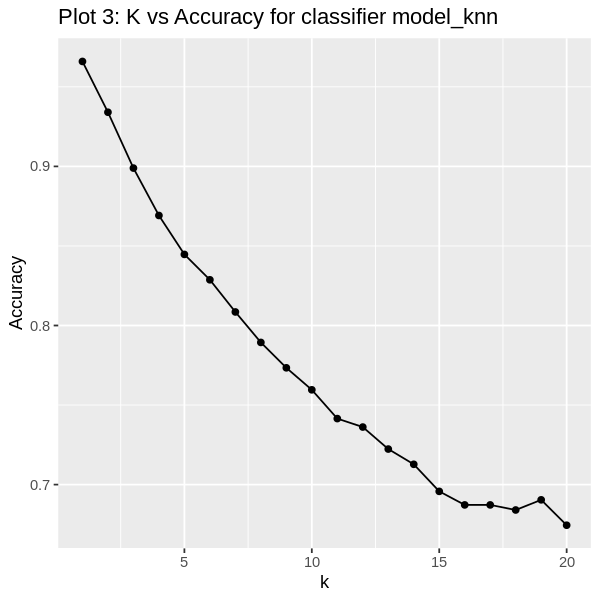

In [17]:
set.seed(1)

# We start by using all our predictors
X_train <- training_set_up %>%
    select(Age, Number.of.sexual.partners, First.sexual.intercourse, Num.of.pregnancies, 
            Smokes..years.,  IUD..years.,  Hormonal.Contraceptives..years.) %>%
    data.frame

Y_train <- training_set_up %>%
    select(Class) %>%
    unlist()

X_test <- test_set %>%
    select(Age, Number.of.sexual.partners, First.sexual.intercourse, Num.of.pregnancies,  
           Smokes..years.,  IUD..years.,  Hormonal.Contraceptives..years.) %>%
    data.frame

Y_test <- test_set %>%
    select(Biopsy) %>%
    unlist()

# We use Cross Validation value of 10 since we have around 940 observations 
train_control <- trainControl(method = "cv", number = 10)
k <- data.frame(k = c(seq(from = 1, to = 20)))

choose_k <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k, trControl =   train_control)

        
 # We plot the K against its accuracy to find a reasonable K value where the accuracy change is not too big for a K change or +/- 1. 
# Although K=1 is the most accurate, we chose K= 3 to ensure that the data isnt overfitting.  
options(repr.plot.height = 5, repr.plot.width = 5)
plot = ggplot(choose_k$results, aes(x = k , y = Accuracy))+
                geom_point() +
                geom_line() +
                 ggtitle("Plot 3: K vs Accuracy for classifier model_knn" )
             
plot

We use K = 3 to train our model and run it against our test set to get the accuracy. We get 0.796, which is a relatively low accuracy.  

In [18]:
k <- data.frame(k= 3 )
model_knn <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k)

test_predict <- predict(model_knn, X_test)
test_results <- confusionMatrix(test_predict, Y_test)
print(test_results$overall[1])

Accuracy 
0.754491 


## Classifier 2
We create another classifier (model_knn_1) with one less predictor (Hormonal.Contraceptive.years..). The skeleton of the code is the same otherwise. We use a constant K value = 3. We get an accuracy of 0.7305389. The **decrease** in accuracy from model_knn means we can assume that *Hormonal.Contraceptive.years..* is a useful predictor of positive Biopsy.

Accuracy 
0.748503 


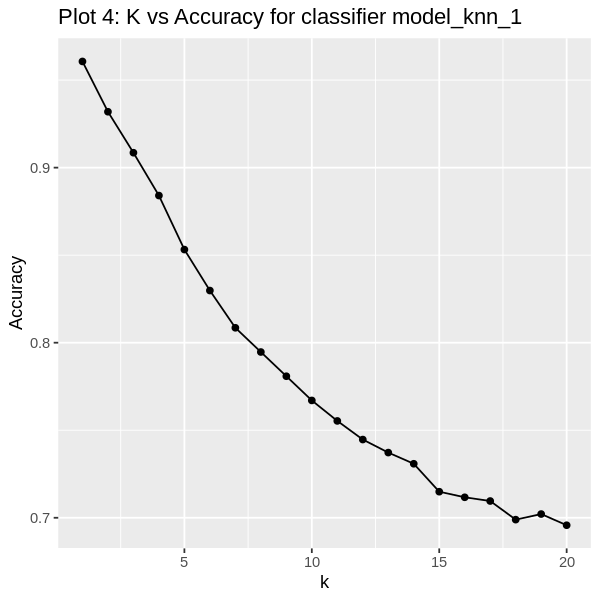

In [19]:
set.seed(1)

X_train_1 <- training_set_up %>%
    select(Age, Number.of.sexual.partners, First.sexual.intercourse, Num.of.pregnancies, Smokes..years., IUD..years.) %>%
    data.frame

Y_train_1 <- training_set_up %>%
    select(Class) %>%
    unlist()

X_test_1 <- test_set %>%
    select(Age, Number.of.sexual.partners, First.sexual.intercourse, Num.of.pregnancies, Smokes..years., IUD..years.) %>%
    data.frame

Y_test_1 <- test_set %>%
    select(Biopsy) %>%
    unlist()
train_control <- trainControl(method = "cv", number = 10)
k <- data.frame(k = c(seq(from = 1, to = 20)))

choose_k_1 <- train(x = X_train_1, y = Y_train_1, method = "knn", tuneGrid = k, trControl =   train_control)

options(repr.plot.height = 5, repr.plot.width = 5)
plot = ggplot(choose_k_1$results, aes(x = k , y = Accuracy))+
                geom_point() +
                geom_line() +
                ggtitle("Plot 4: K vs Accuracy for classifier model_knn_1" )
             
plot

k <- data.frame(k= 3)
model_knn_1 <- train(x = X_train_1, y = Y_train_1, method = "knn", tuneGrid = k)

test_predict_1 <- predict(model_knn_1, X_test_1)
test_results_1 <- confusionMatrix(test_predict_1, Y_test_1)
print(test_results_1$overall[1])

## Classifier 3
We create another classifier (model_knn_2) with one less predictor(IUD..years.). Note: Hormonal.Contraceptives..years. was returned to the model. We use a constant K value = 3. We get an accuracy of 0.7784431. The **decrease** in accuracy from model_knn means we can assume that *IUD..years.* is a useful predictor of positive Biopsy.

 Accuracy 
0.7365269 


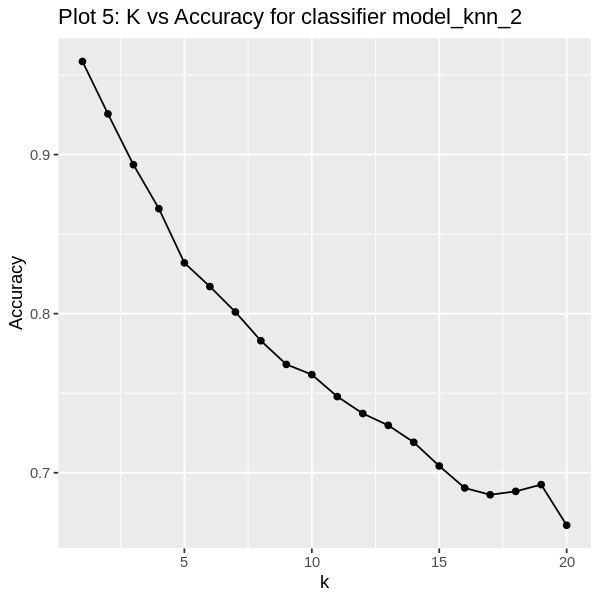

In [20]:
set.seed(1)

X_train_2 <- training_set_up %>%
    select(Age, Number.of.sexual.partners, First.sexual.intercourse, Num.of.pregnancies,  Smokes..years.,  Hormonal.Contraceptives..years. ) %>%
    data.frame

Y_train_2 <- training_set_up %>%
    select(Class) %>%
    unlist()

X_test_2 <- test_set %>%
    select(Age, Number.of.sexual.partners, First.sexual.intercourse, Num.of.pregnancies, Smokes..years., Hormonal.Contraceptives..years.) %>%
    data.frame

Y_test_2 <- test_set %>%
    select(Biopsy) %>%
    unlist()

train_control <- trainControl(method = "cv", number = 10)
k <- data.frame(k = c(seq(from = 1, to = 20)))

choose_k_2 <- train(x = X_train_2, y = Y_train_2, method = "knn", tuneGrid = k, trControl =   train_control)

options(repr.plot.height = 5, repr.plot.width = 5)
plot = ggplot(choose_k_2$results, aes(x = k , y = Accuracy))+
                geom_point() +
                geom_line()+
                 ggtitle("Plot 5: K vs Accuracy for classifier model_knn_2" )
             
plot

k <- data.frame(k= 3)
model_knn_2 <- train(x = X_train_2, y = Y_train_2, method = "knn", tuneGrid = k)

test_predict_2 <- predict(model_knn_2, X_test_2)
test_results_2 <- confusionMatrix(test_predict_2, Y_test_2)
print(test_results_2$overall[1])

## Classifier 4
We create another classifier (model_knn_3) with one less predictor (Smokes..years.). We use a constant K value = 3. We get an accuracy of 0.760479. The **decrease** in accuracy from model_knn means we can assume that *Smokes..years.* is a useful predictor of positive Biopsy.

 Accuracy 
0.7365269 


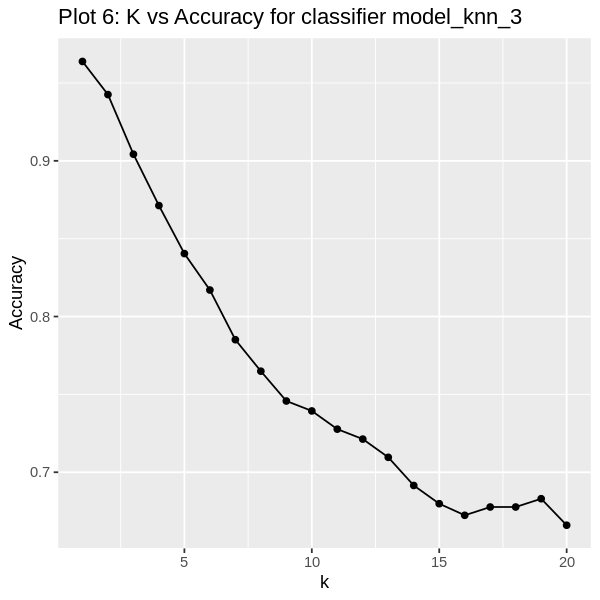

In [21]:
set.seed(1)

X_train_3 <- training_set_up %>%
    select(Age, Number.of.sexual.partners, First.sexual.intercourse, 
           Num.of.pregnancies, IUD..years.,  Hormonal.Contraceptives..years.) %>%
    data.frame

Y_train_3 <- training_set_up %>%
    select(Class) %>%
    unlist()

X_test_3 <- test_set %>%
    select(Age, Number.of.sexual.partners, First.sexual.intercourse, 
           Num.of.pregnancies, IUD..years.,  Hormonal.Contraceptives..years.) %>%
    data.frame

Y_test_3 <- test_set %>%
    select(Biopsy) %>%
    unlist()


train_control <- trainControl(method = "cv", number = 10)
k <- data.frame(k = c(seq(from = 1, to = 20)))

choose_k_3 <- train(x = X_train_3, y = Y_train_3, method = "knn", tuneGrid = k, trControl =   train_control)
options(repr.plot.height = 5, repr.plot.width = 5)
plot = ggplot(choose_k_3$results, aes(x = k , y = Accuracy))+
                geom_point() +
                geom_line()+
                 ggtitle("Plot 6: K vs Accuracy for classifier model_knn_3" )
             
plot

k <- data.frame(k= 3)
model_knn_3 <- train(x = X_train_3, y = Y_train_3, method = "knn", tuneGrid = k)

test_predict_3 <- predict(model_knn_3, X_test_3)
test_results_3 <- confusionMatrix(test_predict_3, Y_test_3)
print(test_results_3$overall[1])

## Classifier 5
We create another classifier (model_knn_4) with one less predictor (Number.of.sexual.partners). We use a constant K value = 3. We get an accuracy of 0.8023952 . The **increase** in accuracy means we can assume that *Number.of.sexual.partners* is not a useful predictor of positive Biopsy in this combination of predictors, and should not be included in the classifier.

 Accuracy 
0.8323353 


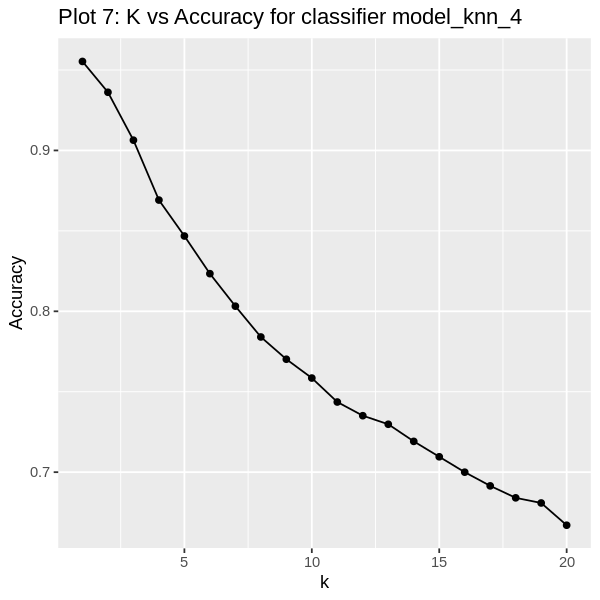

In [22]:
set.seed(1)

X_train_4 <- training_set_up %>%
    select(Age, First.sexual.intercourse, Num.of.pregnancies, # Number.of.sexual.partners,
            Smokes..years.,  IUD..years.,  Hormonal.Contraceptives..years.) %>%
    data.frame

Y_train_4 <- training_set_up %>%
    select(Class) %>%
    unlist()

X_test_4 <- test_set %>%
    select(Age, First.sexual.intercourse,
           #Number.of.sexual.partners,
           Num.of.pregnancies, 
            Smokes..years.,  IUD..years.,  Hormonal.Contraceptives..years.) %>%
    data.frame

Y_test_4 <- test_set %>%
    select(Biopsy) %>%
    unlist()
train_control <- trainControl(method = "cv", number = 10)
k <- data.frame(k = c(seq(from = 1, to = 20)))

choose_k_4 <- train(x = X_train_4, y = Y_train_4, method = "knn", tuneGrid = k, trControl = train_control)

options(repr.plot.height = 5, repr.plot.width = 5)
plot = ggplot(choose_k_4$results, aes(x = k , y = Accuracy))+
                geom_point() +
                geom_line()+
                 ggtitle("Plot 7: K vs Accuracy for classifier model_knn_4" )
             
plot

k <- data.frame(k = 3)
model_knn_4 <- train(x = X_train_4, y = Y_train_4, method = "knn", tuneGrid = k)

test_predict_4 <- predict(model_knn_4, X_test_4)
test_results_4 <- confusionMatrix(test_predict_4, Y_test_4)
print(test_results_4$overall[1])

## Classifier 6
We create another classifier (model_knn_5) with one less predictor (Num.of.pregnancies) in addition to the eliminated Number.of.sexual.partners. We use a constant K value = 3. We get an accuracy of 0.7964072. The **decrease in accuracy** from the classifier knn_model_ 4 means we can assume that *Num.of.pregnancies* is a useful predictor of positive Biopsy in this combination of predictors and should be included in the classifier.

 Accuracy 
0.8083832 


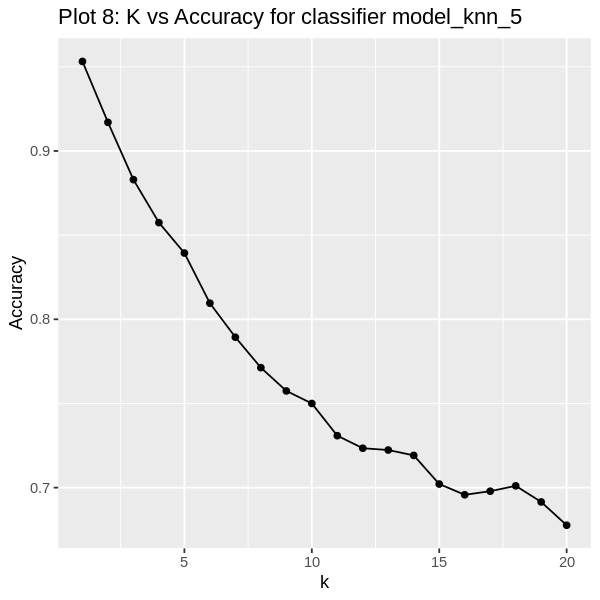

In [23]:
set.seed(1)

X_train_5 <- training_set_up %>%
    select(Age, First.sexual.intercourse, 
           #Num.of.pregnancies,
            Smokes..years.,  IUD..years.,  Hormonal.Contraceptives..years.) %>%
    data.frame

Y_train_5 <- training_set_up %>%
    select(Class) %>%
    unlist()

X_test_5 <- test_set %>%
    select(Age,  First.sexual.intercourse,
           #Num.of.pregnancies,
            Smokes..years.,  IUD..years.,  Hormonal.Contraceptives..years.) %>%
    data.frame

Y_test_5 <- test_set %>%
    select(Biopsy) %>%
    unlist()
train_control <- trainControl(method = "cv", number = 10)
k <- data.frame(k = c(seq(from = 1, to = 20)))

choose_k_5 <- train(x = X_train_5, y = Y_train_5, method = "knn", tuneGrid = k, trControl = train_control)

options(repr.plot.height = 5, repr.plot.width = 5)
plot = ggplot(choose_k_5$results, aes(x = k , y = Accuracy))+
                geom_point() +
                geom_line() +
                 ggtitle("Plot 8: K vs Accuracy for classifier model_knn_5" )
             
plot

k <- data.frame(k = 3)
model_knn_5 <- train(x = X_train_5, y = Y_train_5, method = "knn", tuneGrid = k)

test_predict_5 <- predict(model_knn_5, X_test_5)
test_results_5 <- confusionMatrix(test_predict_5, Y_test_5)
print(test_results_5$overall[1])

## Classifier 7
We create another classifier (model_knn_6) with one less predictor (Age) in addition to the eliminated Number.of.sexual.partners. We use a constant K value = 3. We get an accuracy of 0.7365269. The **decrease in accuracy** from knn_model_4 means we can assume that *Age* is a useful predictor of positive Biopsy in this combination of predictors and should not be included in the classifier.

 Accuracy 
0.7185629 


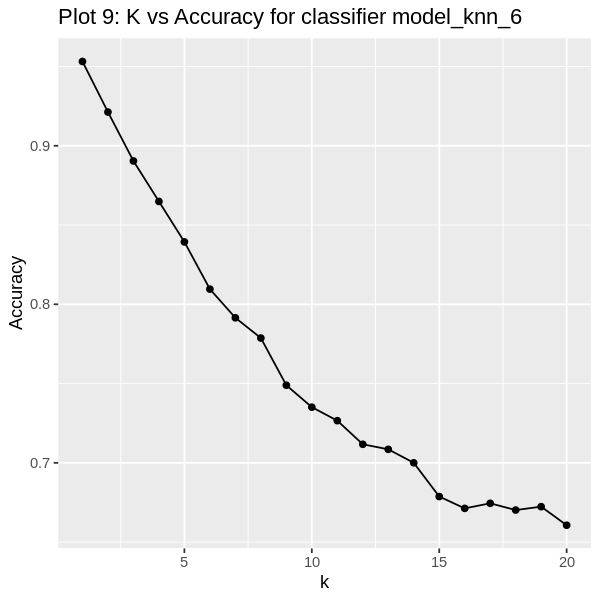

In [24]:
set.seed(1)

X_train_6 <- training_set_up %>%
    select( First.sexual.intercourse, Num.of.pregnancies,
            Smokes..years.,  IUD..years.,  Hormonal.Contraceptives..years.) %>%
    data.frame

Y_train_6 <- training_set_up %>%
    select(Class) %>%
    unlist()

X_test_6 <- test_set %>%
    select( First.sexual.intercourse, Num.of.pregnancies,
            Smokes..years.,  IUD..years.,  Hormonal.Contraceptives..years.) %>%
    data.frame

Y_test_6 <- test_set %>%
    select(Biopsy) %>%
    unlist()
train_control <- trainControl(method = "cv", number = 10)
k <- data.frame(k = c(seq(from = 1, to = 20)))

choose_k_6 <- train(x = X_train_6, y = Y_train_6, method = "knn", tuneGrid = k, trControl = train_control)

options(repr.plot.height = 5, repr.plot.width = 5)
plot = ggplot(choose_k_6$results, aes(x = k , y = Accuracy))+
                geom_point() +
                geom_line()+
                 ggtitle("Plot 9: K vs Accuracy for classifier model_knn_6" )
             
plot

k <- data.frame(k = 3)
model_knn_6 <- train(x = X_train_6, y = Y_train_6, method = "knn", tuneGrid = k)

test_predict_6 <- predict(model_knn_6, X_test_6)
test_results_6 <- confusionMatrix(test_predict_6, Y_test_6)
print(test_results_6$overall[1])

## Classifier 8
We create another classifier (model_knn_6) with one less predictor (First.sexual.intercourse) in addition to the eliminated Number.of.sexual.partners. We use a constant K value = 3. We get an accuracy of 
0.7305389. The **decrease in accuracy** from knn_model_4 means we can assume that *First.sexual.intercourse* is a useful predictor of positive Biopsy in this combination of predictors and should not be included in the classifier.

Accuracy 
0.748503 


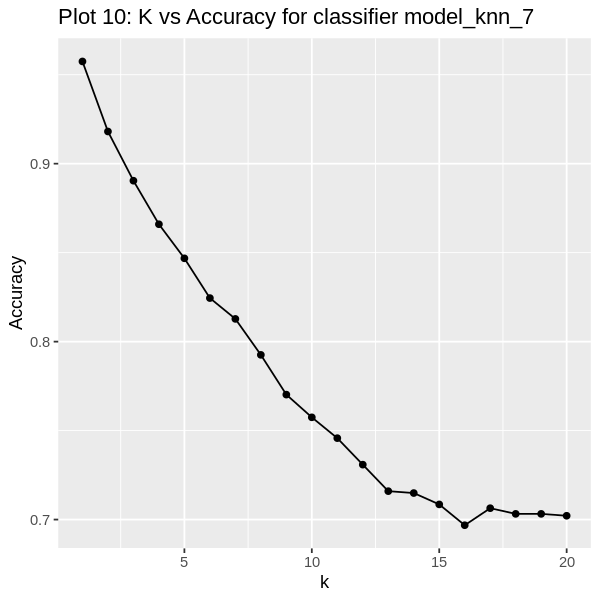

In [25]:
set.seed(1)

X_train_7 <- training_set_up %>%
    select( Age, Num.of.pregnancies,
            Smokes..years.,  IUD..years.,  Hormonal.Contraceptives..years.) %>%
    data.frame

Y_train_7 <- training_set_up %>%
    select(Class) %>%
    unlist()

X_test_7 <- test_set %>%
    select( Age,  Num.of.pregnancies,
            Smokes..years.,  IUD..years.,  Hormonal.Contraceptives..years.) %>%
    data.frame

Y_test_7 <- test_set %>%
    select(Biopsy) %>%
    unlist()
train_control <- trainControl(method = "cv", number = 10)
k <- data.frame(k = c(seq(from = 1, to = 20)))

choose_k_7 <- train(x = X_train_7, y = Y_train_7, method = "knn", tuneGrid = k, trControl = train_control)

options(repr.plot.height = 5, repr.plot.width = 5)
plot = ggplot(choose_k_7$results, aes(x = k , y = Accuracy))+
                geom_point() +
                geom_line() +
                ggtitle("Plot 10: K vs Accuracy for classifier model_knn_7" )
             
plot

k <- data.frame(k = 3)
model_knn_7 <- train(x = X_train_7, y = Y_train_7, method = "knn", tuneGrid = k)

test_predict_7 <- predict(model_knn_7, X_test_7)
test_results_7 <- confusionMatrix(test_predict_7, Y_test_7)
print(test_results_7$overall[1])

# Results
model_knn_4 is the classifier that gives the highest accuracy using the predictor combination: "Age","First.sexual.intercourse", "Smokes..years.", "Hormonal.Contraceptives..years.","IUD..years.", "Num.of.pregnancies". 

Below is the confusionMatrix display of model_knn_4:

In [26]:
test_results_4

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 136   8
         1  20   3
                                          
               Accuracy : 0.8323          
                 95% CI : (0.7669, 0.8856)
    No Information Rate : 0.9341          
    P-Value [Acc > NIR] : 1.00000         
                                          
                  Kappa : 0.0959          
                                          
 Mcnemar's Test P-Value : 0.03764         
                                          
            Sensitivity : 0.8718          
            Specificity : 0.2727          
         Pos Pred Value : 0.9444          
         Neg Pred Value : 0.1304          
             Prevalence : 0.9341          
         Detection Rate : 0.8144          
   Detection Prevalence : 0.8623          
      Balanced Accuracy : 0.5723          
                                          
       'Positive' Class : 0               
                              

In [27]:
Results_comparison = data.frame(seq(Y_test_4), X_test_4,  Actual = Y_test_4, Predicted = test_predict_4)
head(Results_comparison)
nrow(Results_comparison)

,seq.Y_test_4.,Age,First.sexual.intercourse,Num.of.pregnancies,Smokes..years.,IUD..years.,Hormonal.Contraceptives..years.,Actual,Predicted
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
Biopsy1,1,-0.02716698,-0.04809323,0.4640831,-0.2936676,-0.2639984,1.5344926,0,0
Biopsy2,2,1.92475507,2.76222445,-0.2198288,-0.2936676,-0.2639984,0.7277822,0,0
Biopsy3,3,1.80993612,0.30319648,1.8319069,-0.2936676,3.7445177,-0.6167350,0,1
Biopsy4,4,1.46547929,0.30319648,-0.2198288,-0.2936676,-0.2639984,3.4168168,0,1
Biopsy5,5,1.58029824,-0.04809323,1.1479950,-0.2936676,-0.2639984,2.0722995,0,0
Biopsy6,6,1.46547929,0.30319648,-0.9037407,-0.2936676,-0.2639984,-0.5495092,1,0


[1] 167

### Table 13: Results of knn_model_4, with both predicted and actual class labels

In [28]:
cc_plot_data_hist = Results_comparison %>%
            select("Age","First.sexual.intercourse", "Smokes..years.", 
                   "Hormonal.Contraceptives..years.","IUD..years.", "Num.of.pregnancies",
                   "Actual", "Predicted")%>%
                     gather(key = Predictors, value = Value, -Actual, -Predicted) %>%
                    group_by(Predicted, Predictors)
 head(cc_plot_data_hist)

Actual,Predicted,Predictors,Value
<fct>,<fct>,<chr>,<dbl>
0,0,Age,-0.02716698
0,0,Age,1.92475507
0,1,Age,1.80993612
0,1,Age,1.46547929
0,0,Age,1.58029824
1,0,Age,1.46547929


### Table 14: Gathered data with both actual and predicted labels for each point

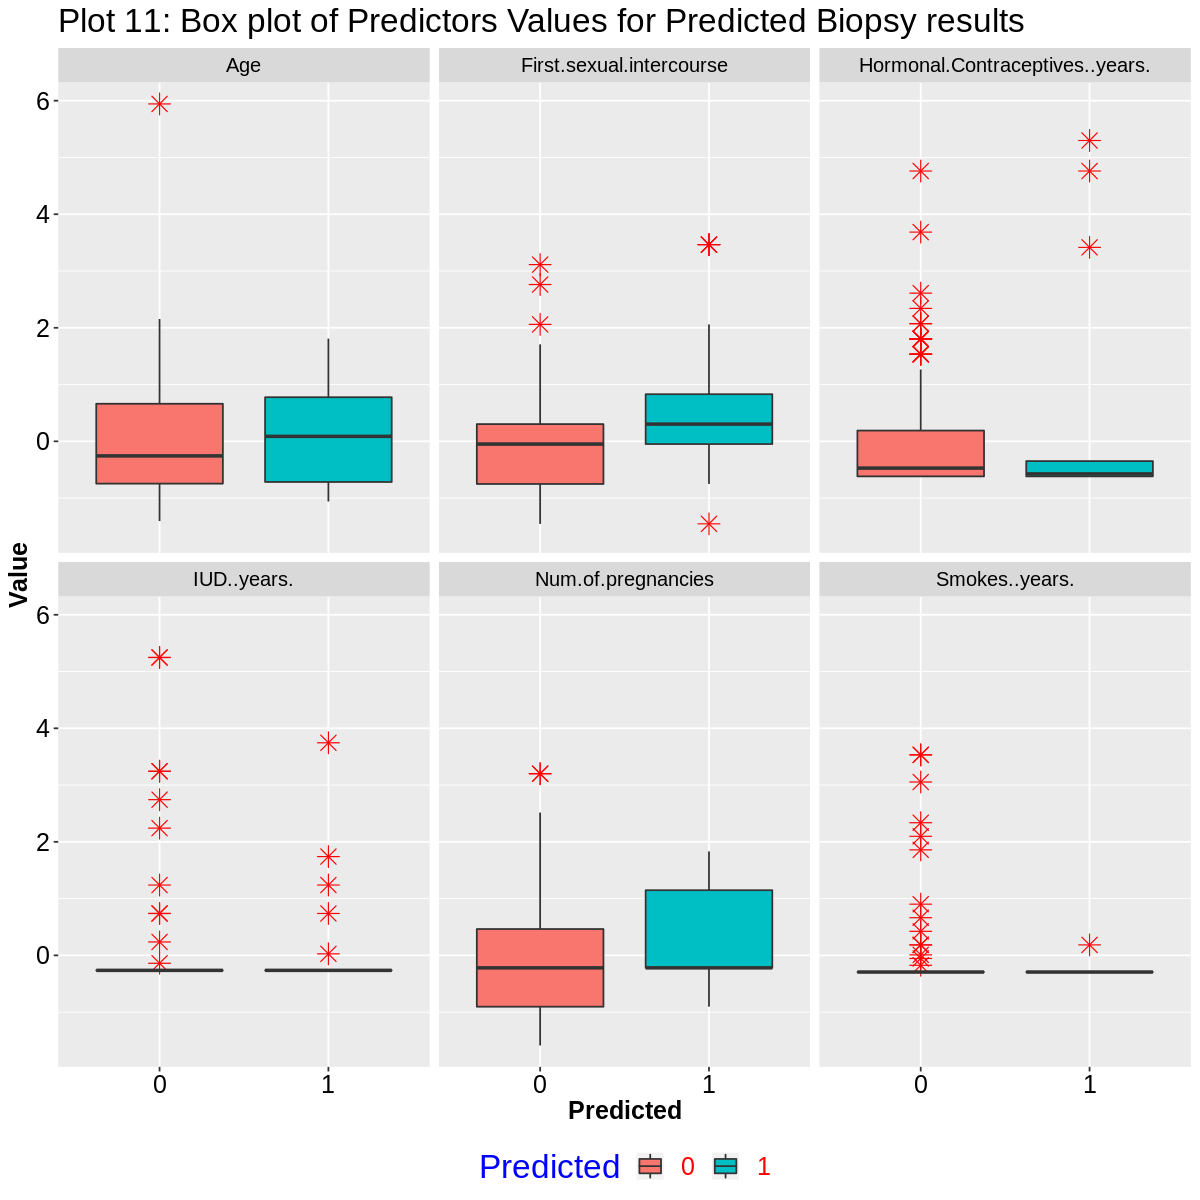

In [29]:

options(repr.plot.height = 10, repr.plot.width = 10)
cc_plot_box = cc_plot_data_hist %>%
            ggplot(aes(x = Predicted, y = Value, fill = Predicted))+
            geom_boxplot(outlier.colour="red", outlier.shape=8,
                outlier.size=4)+
            facet_wrap(~ Predictors)+
            theme(axis.text.x =element_text(colour="black", size = 15), axis.text.y =element_text(colour="black", size = 15), 
                  legend.position="bottom", strip.text.x = element_text(size=12, color="black"), 
                  legend.title = element_text(color = "blue", size = 20),
              legend.text = element_text(color = "red", size = 15), axis.title.x = element_text(color="black", size=15, face="bold"),
        axis.title.y = element_text(color="black", size=15, face="bold"), plot.title = element_text(colour = 'black', size = 20))+ 
            ggtitle( "Plot 11: Box plot of Predictors Values for Predicted Biopsy results " )
cc_plot_box 

# Discussion


As shown by the boxplots above, our model is relatively inaccurate, which reinforces the following notion:
* **Within this specific data set, these lifestyle variables are not ideal in order to build a classifier that can accurately predict cervical cancer in female patients**

**Expectations** <br/>
Originally, when we set our research question, we wanted to use lifestyle choices to search for patterns which could be used to detect the susceptibility of certain women to cervical cancer. However, despite all the classifiers we have made, we have come to the conclusion that our original hypothesis was incorrect: using lifestyle choices in order to classify and predict the prevalence of cervical cancer in women using this data set is not sound. Despite a fair few studies conducted on the long-term reproductive health of women relative to their reproductive and lifestyle choices such as birth control, number of pregnancies, sexual partners etc., the combination of these as predictor variables do not produce a sound and conclusive classifer in our dataset. For example, when we added the predictor variable of "number.of.sexual.partners", it seemed to decrease our classifier's accuracy. This was counterintuitive as to what we expected based on the studies we had read and understood.<sup>2</sup>


**Impact** <br/>
Since our conclusion did not yield any statistically significant and sound results, the impact of this research question would have to be made broader in terms of how we are to study how women's lifestyle choices were to impact the prevalence of cervical cancer. Now, if we are to build on such a research question, it might be better to focus on how lifestyle choices of women impacted their overall reproductive health, rather than such a specific target such as cervical cancer. This result can also be taken with a few grains of salt, as the results might be different if we were to use similar data sets from different areas.

**Future Questions** <br/>
Again, due to the inconclusivity that our best model presented to us, some more impactful discussions and studies will need to be conducted in order to determine whether a female's lifestyle choices do or do not noticeably affect their reproductive health, which is important knowledge for all women who wish to stay healthy. As more and more forms of contraception are put out in the pharmaceutical field, it is important to learn and see what are their potential effects on general health. A couple of research questions that can be delved deeper as food for thought from this project could be: 

* From a medical perspective alone (as to prevent bias) how can a biological female avoid certain choices at certain ages to decrease their odds of later getting cancer?

* Does the number of sexual partners have a direct non-confounding and/or non-lurking relationship with the diagnoses and prevalence of cervical cancer in women? 

* How can studies be conducted on women's reproductive health in a non-biased and non-judgemental manner?








# Citations:



<sup>1</sup> Worldwide Cancer Data, https://www.wcrf.org/dietandcancer/cancer-trends/worldwide-cancer-data, accessed (November 8th, 2019).

<sup>2</sup> Canadian Cancer Society, https://www.cancer.ca/en/cancer-information/cancer-type/cervical/risks/?region=on#Sexual_activity, accessed (November 8th, 2019).